# Importing important liberaries

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from IPython import display
%matplotlib inline

# Busines and data understanding 
I'll be working with the __Reviews__ and __Listing__ data from __Airbnb__ for __[Seattle](https://www.kaggle.com/datasets/airbnb/seattle)__ and __[Boston](https://www.kaggle.com/datasets/airbnb/boston)__ downloaded from __[Kaggle](https://www.kaggle.com/datasets/airbnb/)__ to try to answer the following questions:
1.  What are the most common themes in guest reviews, and how do they correlate with review scores?
3.  What are the seasonal patterns in listing prices and availability in Boston?
4.  How much are Airbnb homes earning in certain time frames and areas? 

Positive reviews might highlight cleanliness, responsiveness, or convenience, while negative reviews might mention noise or poor communication. Price, amenities, location, and host responsiveness might significantly impact review scores. Prices and demand increase during peak tourist seasons or significant events.

## Data preprocessing for the Reviews:
Let's clean and preprocess textual data by removing stopwords, punctuation, and special characters. Then, we will use natural language processing (NLP) techniques, like TF-IDF or sentiment analysis, to extract meaningful insights.

In [172]:
import nltk
from nltk.corpus import stopwords
import re

df_reviews_s = pd.read_csv('data/airbnb/seattle/reviews.csv')
df_reviews_b = pd.read_csv('data/airbnb/boston/reviews.csv')

#print(f"Features of the Review data for Seattle:\n {df_reviews_s.head()}")
#print(f"******************")
#print(f"Features of the Review data for Boston:\n {df_reviews_b.head()}")
#print(f"******************")
#print(f"Features of the Listings data for Seattle:")
#print(f"******************")
#print(f"Features of the Listings data for Boston:\n {df_listings_b.head()}")

In [173]:
# Check the missing data. The following will check the missing values in each column. 
# But this will not affect what we are trying to do.
print("Missing data in Seattle reviews:")
print(df_reviews_s.isnull().sum())

print("\nMissing data in Boston reviews:")
print(df_reviews_b.isnull().sum())


Missing data in Seattle reviews:
listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

Missing data in Boston reviews:
listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         53
dtype: int64


In [174]:
nltk.download('stopwords')

def clean_text(text):
    # Remove punctuation and special characters
    #print(f"Data before removing punctuations and special characters:\n {text}")
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    #print(f"Data after removing punctuations and special characters:\n {text}")
    
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize text
    words = text.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Join the words back into a single string
    return ' '.join(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abdualazem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [175]:
# Clean the comment:

df_reviews_s['cleaned_comments'] = df_reviews_s['comments'].apply(lambda x: clean_text(str(x)))
df_reviews_b['cleaned_comments'] = df_reviews_b['comments'].apply(lambda x: clean_text(str(x)))

Let's find the most frequently occurring words in the "cleaned_comments" column to understand the themes that guests often mention.

In [176]:
from collections import Counter

# Split all cleaned comments into words and count word frequency
words_s = ' '.join(df_reviews_s['cleaned_comments']).split()
words_b = ' '.join(df_reviews_b['cleaned_comments']).split()
word_counts_s = Counter(words_s)
word_counts_b = Counter(words_b)

# Display the most common words
common_words_s = word_counts_s.most_common(20)
common_words_b = word_counts_b.most_common(20)

print(f"Word and counts for Seattle:\n {common_words_s}")
print(f"Word and counts for Boston:\n {common_words_b}")


Word and counts for Seattle:
 [('great', 60760), ('stay', 51979), ('place', 45400), ('seattle', 39504), ('us', 31835), ('clean', 29118), ('location', 28539), ('would', 26127), ('apartment', 25831), ('comfortable', 25037), ('nice', 23044), ('house', 22718), ('host', 20715), ('room', 20701), ('home', 20227), ('everything', 19714), ('neighborhood', 18121), ('easy', 17937), ('time', 17767), ('recommend', 16449)]
Word and counts for Boston:
 [('great', 40243), ('stay', 35383), ('boston', 32012), ('place', 30330), ('apartment', 28310), ('clean', 23014), ('location', 22852), ('us', 21556), ('room', 19975), ('nice', 18912), ('would', 18826), ('host', 17661), ('comfortable', 15877), ('house', 14407), ('everything', 13832), ('easy', 12948), ('really', 12599), ('recommend', 12463), ('time', 12259), ('good', 11497)]


### Visualise the words
We should look at the frequesnt word used in the review and visulaise them to get a sense of what's the general mood. 

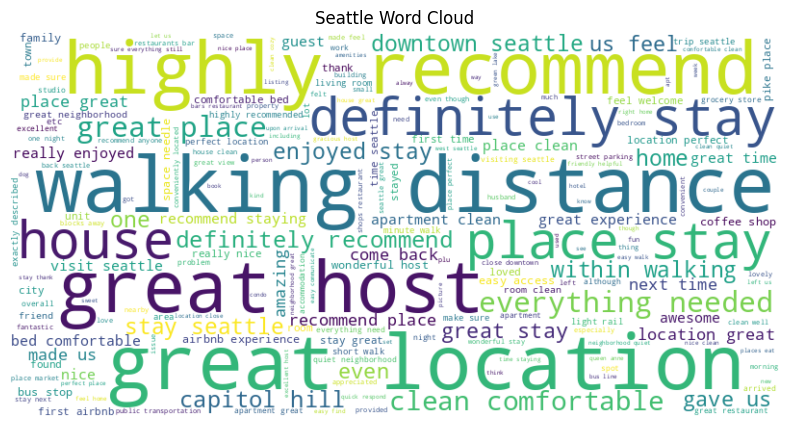

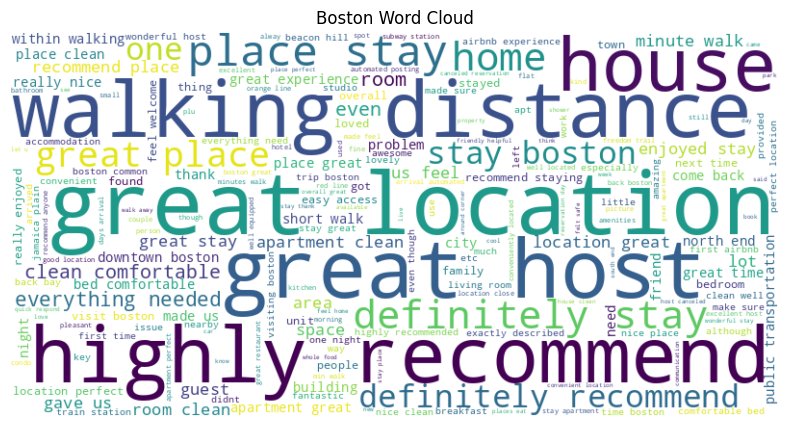

In [177]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_s = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words_s))
wordcloud_b = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words_b))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_s, interpolation='bilinear')
plt.axis('off')
plt.title("Seattle Word Cloud")
plt.savefig('./plots/seattle_wordcloud.png')
plt.show()

# Plot Boston word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_b, interpolation='bilinear')
plt.axis('off')
plt.title("Boston Word Cloud")
plt.savefig('./plots/boston_wordcloud.png')  # Save the figure
plt.show()

## Average review length
Let's analyse the average length of reviews to understand guest engagement and possibly segment reviews based on length.

In [178]:
df_reviews_s['review_length'] = df_reviews_s['cleaned_comments'].apply(lambda x: len(x.split()))
avg_length_s = df_reviews_s['review_length'].mean()

df_reviews_b['review_length'] = df_reviews_b['cleaned_comments'].apply(lambda x: len(x.split()))
avg_length_b = df_reviews_b['review_length'].mean()

print(f"Seattle average review length: {avg_length_s:.2f} words")
print(f"Boston average review length: {avg_length_b:.2f} words")

Seattle average review length: 35.64 words
Boston average review length: 33.19 words


## Sentiment analysis
Sentiment analysis aims to determine whether reviews are generally positive, neutral, or negative. For this, we can use TextBlob or VADER, which are famous for sentiment analysis on English text data.

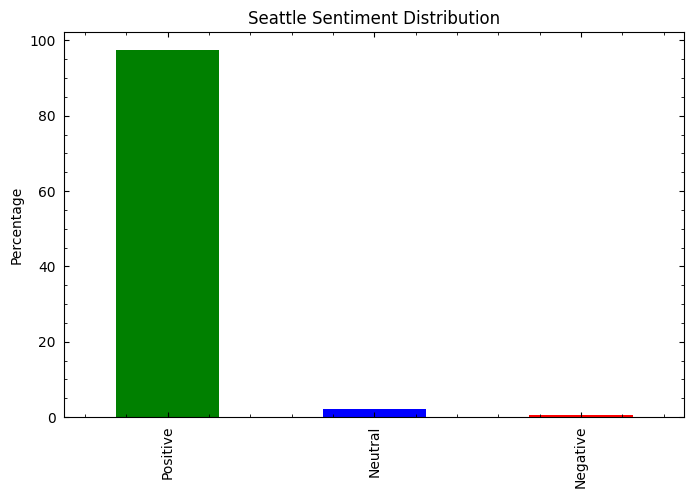

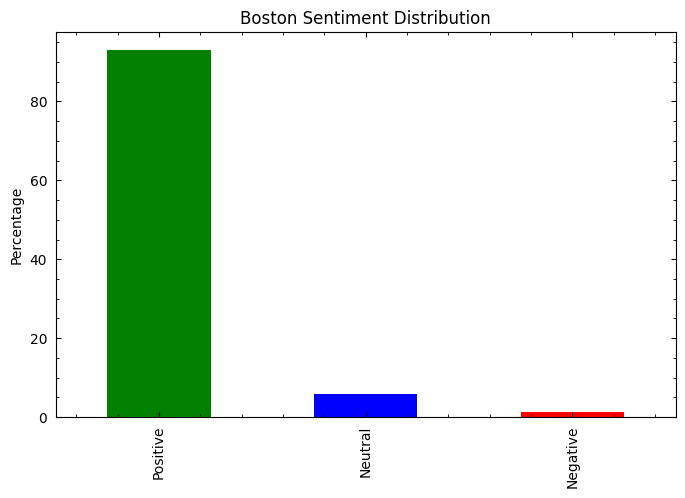

In [179]:
from textblob import TextBlob

# Define a function to get sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Ranges from -1 (negative) to 1 (positive)

# Apply sentiment analysis
df_reviews_s['sentiment_score'] = df_reviews_s['cleaned_comments'].apply(get_sentiment)
df_reviews_b['sentiment_score'] = df_reviews_b['cleaned_comments'].apply(get_sentiment)

# Classify sentiment as Positive, Negative, or Neutral
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df_reviews_s['sentiment'] = df_reviews_s['sentiment_score'].apply(classify_sentiment)
df_reviews_b['sentiment'] = df_reviews_b['sentiment_score'].apply(classify_sentiment)

# Display sentiment distribution
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
sentiment_counts_s = df_reviews_s['sentiment'].value_counts(normalize=True)*100
sentiment_counts_s.plot(kind='bar', color=['green', 'blue', 'red'], figsize=(8, 5))
plt.title('Seattle Sentiment Distribution')
plt.ylabel('Percentage')
plt.xlabel('')
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.tick_params(axis='x', pad=6)  
ax0.tick_params(axis='y', pad=6)  
ax0.minorticks_on()
plt.savefig('./plots/seattle_sentiment.png')
plt.show()

gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
sentiment_counts_b = df_reviews_b['sentiment'].value_counts(normalize=True)*100
sentiment_counts_b.plot(kind='bar', color=['green', 'blue', 'red'], figsize=(8, 5))
plt.title('Boston Sentiment Distribution')
plt.ylabel('Percentage')
plt.xlabel('')
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.tick_params(axis='x', pad=6)  
ax0.tick_params(axis='y', pad=6)  
ax0.minorticks_on()
plt.savefig('./plots/boston_sentiment.png')
plt.show()

In [180]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

# Step 1: Keyword Analysises
threshold = 0.20  # You can adjust this based on your dataset

# Create a high/low rating column based on sentiment score
df_reviews_s['high_rating'] = df_reviews_s['sentiment_score'] >= threshold
df_reviews_b['high_rating'] = df_reviews_b['sentiment_score'] >= threshold

correlation_s = df_reviews_s['review_length'].corr(df_reviews_s['sentiment_score'])
correlation_b = df_reviews_b['review_length'].corr(df_reviews_b['sentiment_score'])

print("Seattle correlation between review length and sentiment score:", correlation_s)
print("Boston correlation between review length and sentiment score:", correlation_b)

Seattle correlation between review length and sentiment score: -0.2693102578880889
Boston correlation between review length and sentiment score: -0.28538854090973653


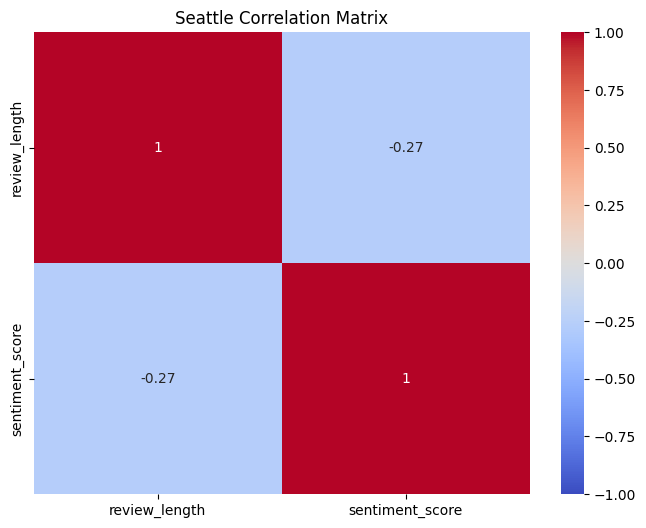

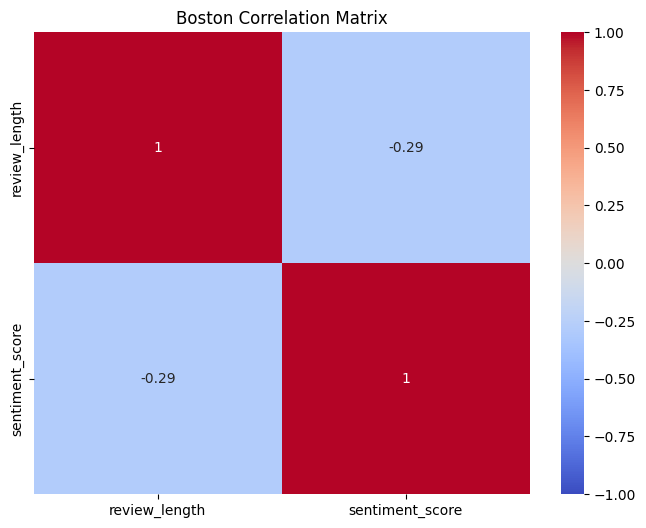

In [181]:
import seaborn as sns

# Select only the numerical columns for the correlation matrix
numeric_df_s = df_reviews_s[['review_length', 'sentiment_score']]
numeric_df_b = df_reviews_b[['review_length', 'sentiment_score']]

# Compute the correlation matrix
correlation_matrix_s = numeric_df_s.corr()
correlation_matrix_b = numeric_df_b.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_s, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Seattle Correlation Matrix")
plt.savefig('./plots/boston_correlation.png')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_b, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Boston Correlation Matrix")
plt.savefig('./plots/boston_correlation.png')
plt.show()

# Listings data processing for Boston and Seattle 

In [237]:
df_listings_s = pd.read_csv('data/airbnb/seattle/listings.csv')
df_listings_b = pd.read_csv('data/airbnb/boston/listings.csv')

df_listings_s.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [195]:
def clean_data(df):
    """
    Cleans the DataFrame by imputing missing values.
    - Numerical columns: Impute with the mean.
    - Categorical columns: Impute with the mode.
    
    Args:
        df (pd.DataFrame): The input DataFrame to clean.
    
    Returns:
        pd.DataFrame: A cleaned DataFrame with missing values imputed.
    """
    # Identify columns with 100% missing values
    fully_missing_cols = df.columns[df.isnull().mean() == 1]
    print(f"Columns with 100% missing data: {fully_missing_cols.tolist()}")
    df = df.drop(columns=fully_missing_cols, axis=1)
    
    for column in df.columns:
        if df[column].dtype in ['float64', 'int64']:  # Check for numerical columns
            mean_value = df[column].mean()
            #df[column].fillna(mean_value, inplace=True)
            df.fillna({column: mean_value}, inplace=True)
        else:  # Treat as categorical
            mode_value = df[column].mode()[0]  # Mode returns a Series; take the first value
            #df[column].fillna(mode_value, inplace=True)
            df.fillna({column: mode_value}, inplace=True)
    
    return df

In [262]:
df_listings_s = clean_data(df_listings_s)
df_listings_b = clean_data(df_listings_b)


missing_values_count = df_listings_s.isnull().sum().sum()
print(f"Total missing values after cleaning: {missing_values_count}")
#df_listings_s.columns

Columns with 100% missing data: []
Columns with 100% missing data: []
Total missing values after cleaning: 0


In [263]:
# Prices and fees are likely strings due to currency symbols. Convert them to numeric:
for col in ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']:
    df_listings_s[col] = df_listings_s[col].replace('[\$,]', '', regex=True).astype(float)
    df_listings_b[col] = df_listings_b[col].replace('[\$,]', '', regex=True).astype(float)



In [264]:
df_listings_s['monthly_earnings'] = df_listings_s['price'] * df_listings_s['availability_30']
df_listings_b['monthly_earnings'] = df_listings_b['price'] * df_listings_b['availability_30']


In [265]:
earnings_s = df_listings_s.groupby('neighbourhood_cleansed')['monthly_earnings'].sum().sort_values(ascending=False)
earnings_b = df_listings_b.groupby('neighbourhood_cleansed')['monthly_earnings'].sum().sort_values(ascending=False)



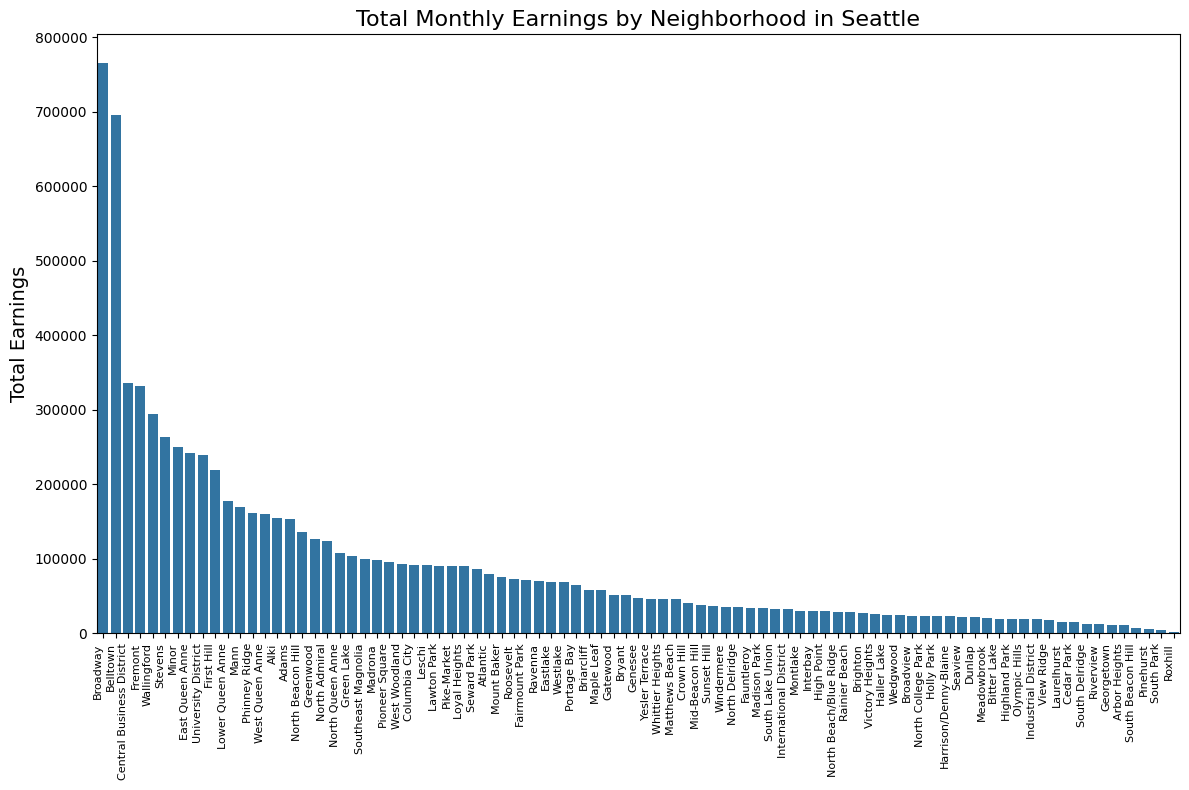

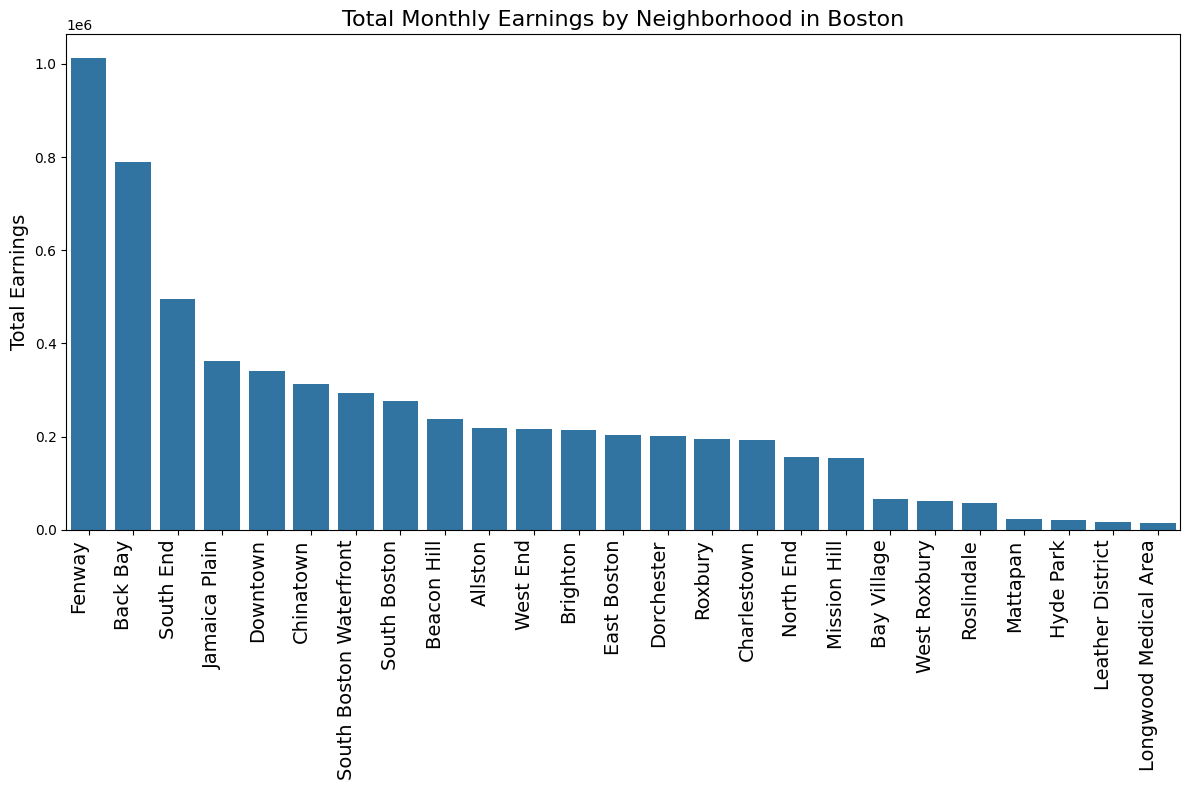

In [266]:
#import seaborn as sns
#import pandas as pd

# Reset the index to prepare for Seaborn plotting
earnings_df_s = earnings_s.reset_index()
earnings_df_b = earnings_b.reset_index()
earnings_df_s.columns = ['Neighborhood', 'Total Earnings']
earnings_df_b.columns = ['Neighborhood', 'Total Earnings']

# Create a barplot
plt.figure(figsize=(12, 8))
sns.barplot(data=earnings_df_s, x='Neighborhood', y='Total Earnings')

# Add labels and title
plt.title("Total Monthly Earnings by Neighborhood in Seattle", fontsize=16)
plt.xlabel("", fontsize=14)
plt.ylabel("Total Earnings", fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.tight_layout()
plt.savefig('./plots/seattle_earnings_neighborhood.png')
# Show the plot
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=earnings_df_b, x='Neighborhood', y='Total Earnings')

# Add labels and title
plt.title("Total Monthly Earnings by Neighborhood in Boston", fontsize=16)
plt.xlabel("", fontsize=14)
plt.ylabel("Total Earnings", fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=14)
plt.tight_layout()
plt.savefig('./plots/boston_earnings_neighborhood.png')
# Show the plot
plt.show()

In [267]:
avg_price_s = df_listings_s['price'].mean()
avg_price_b = df_listings_b['price'].mean()
print(f"Average price in Seattle: ${avg_price_s:.2f}")
print(f"Average price in Boston: ${avg_price_b:.2f}")


Average price in Seattle: $127.98
Average price in Boston: $173.93


In [268]:
# Revenu
# Prepare reviews data
df_reviews_s['date'] = pd.to_datetime(df_reviews_s['date'])
df_reviews_b['date'] = pd.to_datetime(df_reviews_b['date'])

# Group reviews by month and listing
df_reviews_s['month'] = df_reviews_s['date'].dt.to_period("M")
df_reviews_b['month'] = df_reviews_b['date'].dt.to_period("M")

seattle_monthly_reviews = df_reviews_s.groupby(['listing_id', 'month']).size().reset_index(name='reviews_per_month')
boston_monthly_reviews = df_reviews_b.groupby(['listing_id', 'month']).size().reset_index(name='reviews_per_month')

                                                                                          # Merge reviews with listings to calculate revenue
def calculate_revenue(reviews, listings, review_rate=0.5):
    # Merge listings with reviews
    merged = reviews.merge(listings[['id', 'price']], left_on='listing_id', right_on='id')
    # Estimate bookings
    merged['estimated_bookings'] = merged['reviews_per_month'] / review_rate
    # Calculate revenue
    merged['monthly_revenue'] = merged['price'] * merged['estimated_bookings']
    return merged
    
seattle_revenue = calculate_revenue(seattle_monthly_reviews, df_listings_s)
boston_revenue = calculate_revenue(boston_monthly_reviews, df_listings_b)


In [269]:
boston_total_revenue = boston_revenue['monthly_revenue'].sum()
seattle_total_revenue = seattle_revenue['monthly_revenue'].sum()

print(f"Boston Total Revenue: ${boston_total_revenue:,.2f}")
print(f"Seattle Total Revenue: ${seattle_total_revenue:,.2f}")

Boston Total Revenue: $20,102,584.00
Seattle Total Revenue: $18,475,812.00


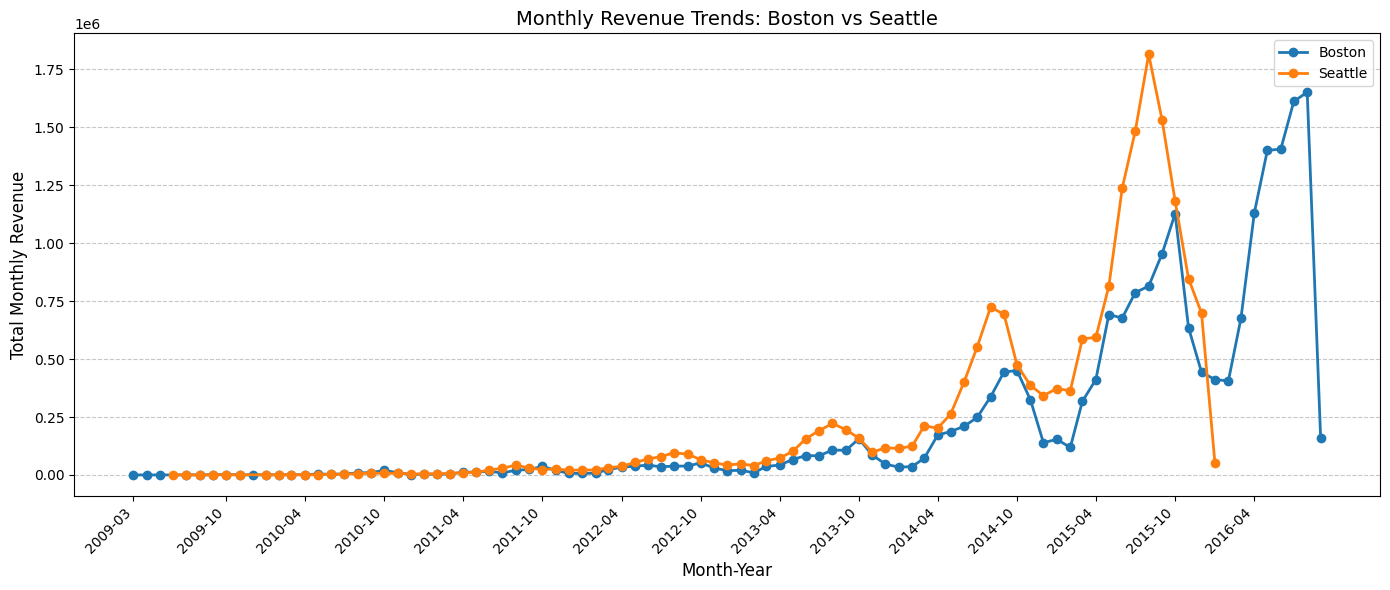

In [270]:
# Group revenue by month
boston_monthly_revenue = boston_revenue.groupby('month')['monthly_revenue'].sum()
seattle_monthly_revenue = seattle_revenue.groupby('month')['monthly_revenue'].sum()

# Convert the PeriodIndex to DatetimeIndex for both datasets
boston_monthly_revenue.index = boston_monthly_revenue.index.to_timestamp()
seattle_monthly_revenue.index = seattle_monthly_revenue.index.to_timestamp()

# Plot
plt.figure(figsize=(14, 6))

# Plot Boston and Seattle data
plt.plot(
    boston_monthly_revenue.index, 
    boston_monthly_revenue, 
    label='Boston', 
    linewidth=2, 
    marker='o'
)
plt.plot(
    seattle_monthly_revenue.index, 
    seattle_monthly_revenue, 
    label='Seattle', 
    linewidth=2, 
    marker='o'
)

# Improve x-axis ticks: show every 6th month
plt.xticks(
    ticks=boston_monthly_revenue.index[::6], 
    labels=boston_monthly_revenue.index[::6].strftime('%Y-%m'), 
    rotation=45, 
    ha='right', 
    fontsize=10
)

# Labels and title
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Monthly Revenue', fontsize=12)
plt.title('Monthly Revenue Trends: Boston vs Seattle', fontsize=14)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend()

# Save and display
plt.tight_layout()
plt.savefig('./plots/improved_monthly_revenue_boston_seattle.png')
plt.show()

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# One-hot encode 'room_type'
X = pd.get_dummies(df_listings_s[['room_type', 'accommodates', 'bathrooms', 'bedrooms', 'latitude', 'longitude']], 
                   columns=['room_type'], 
                   drop_first=True)

y = df_listings_s['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3320.203855366492
